# project introduction

# Grocery Basket Analysis using Market Basket Optimization

## Objective
To analyze grocery transactions and uncover associations between commonly purchased items using the Apriori algorithm. This helps identify product bundles and generate insights for cross-selling strategies in retail.

In this project, analyze the Instacart dataset by sampling 100,000 and more transactions and focusing on the top 35 most frequently purchased items.


Although the entire dataset contains over 32 million rows, I worked on a clean filtered subset with over 3–5 lakh rows after sampling 1 lakh orders. This approach helps maintain performance while keeping insights meaningful and valid.



# Table of Content

- Add Product Name to Transaction History
- Top 10 Products Ordered the Most
- Top 10 Users Who Ordered the Most
- Create Basket Format (One Row = One Order)
- Apriori: Frequently Bought Together Products
- Scatter Plot (Lift vs Confidence)
- Number of Products per Order
- Merge departments.csv into final_data
- Why Use departments.csv?
- Merge with products.csv and then with final_data
- Top 10 Departments by Orders
- Count Top Products
- Orders by Day of Week
-  Orders by Hour of Day
-  Days Since Prior Order
-  Total Unique Products Ordered
-  Top Product Pairs (2-Item Combos)
-  Share of Top 5 Products
-  Orders Over Time
-  Top 5 Users with Most Orders
-  Average Number of Products per Order
-  Distribution of Basket Sizes
-  Most Frequently Reordered Products
-  Word Cloud of Most Ordered Products
-  Reordered vs New Products
-  Which Users Ordered the Most?


# Required libraries

In [2]:
# Basic data handling
import pandas as pd
import numpy as np


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Market Basket Algorithm
# Import Apriori algorithm to find frequent itemsets
# Import association_rules to generate rules from frequent itemsets
# m1xtend a module in machine learning extension
from mlxtend.frequent_patterns import apriori, association_rules 


In [7]:
# Settings for better visual output
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

# loading dataset

In [8]:
# Load Instacart dataset files
orders = pd.read_csv(r"C:\Users\pawar\Downloads\archive\orders.csv")
products = pd.read_csv(r"C:\Users\pawar\Downloads\archive\products.csv")
prior = pd.read_csv(r"C:\Users\pawar\Downloads\archive\order_products__prior.csv")

print("Data loaded successfully!")

Data loaded successfully!


We are using the following files from the Instacart Market Basket dataset:

- orders.csv — metadata about each order (order ID, user ID)
- products.csv— maps product IDs to product names
- order_products__prior.csv — the full transaction history of prior orders


# Data of Rows and Column

In [9]:
# Preview the first 10 rows
prior.head(10) #entire transaction history** of prior orders, Each row represents a single product purchased in a specific order.

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [10]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [11]:
orders.head(10) # it get first 10 record of Who placed the order,When it was placed ,Whether it was the first or repeated order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [12]:
# Preview and shape
print("order product prior is : ",prior.shape)
print("product is : ",products.shape)
print("order is : ",orders.shape)


order product prior is :  (32434489, 4)
product is :  (49688, 4)
order is :  (3421083, 7)


# Merging Product Name and Order Data

### Add Product Name to Transaction History

We merge "order_products__prior.csv" with "products.csv" using "product_id."

This allows us to convert each "product_id" in the transactions to a human-readable product_name.

In [13]:
# Keeping relevant columns from products
product_details = products[['product_id', 'product_name']]

# Merging to add product names to each order line
merged = prior.merge(product_details, on='product_id', how='left')

# show the merged data
print("Merged Data (after product join):", merged.shape)
merged.head()


Merged Data (after product join): (32434489, 5)


,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,2,28985,2,1,Michigan Organic Kale
2,2,9327,3,0,Garlic Powder
3,2,45918,4,1,Coconut Butter
4,2,30035,5,0,Natural Sweetener


#### Add Order Metadata

We merge with `orders.csv` using `order_id` to include additional details:
- `user_id`: who placed the order
- `order_hour_of_day`: when the order was placed
- `days_since_prior_order`: how soon they reordered


# to avoid merory error we used smaller data because it as 32 million + rows from order_products__prior.csv and doing operations like groupby() on it all at once can exceed RAM, especially on local machines.

In [16]:
# Step 1: Sample 100000 orders
sample_order_ids = orders['order_id'].drop_duplicates().sample(n=100000, random_state=42)

# Step 2: Get prior data for only those orders
prior_sampled = prior[prior['order_id'].isin(sample_order_ids)]

# Step 3: Filter out orders with only 1 item
order_counts = prior_sampled.groupby('order_id')['product_id'].count()
valid_order_ids = order_counts[order_counts > 1].index
prior_sampled = prior_sampled[prior_sampled['order_id'].isin(valid_order_ids)]

#Step 4: Add product name
product_info = products[['product_id', 'product_name']]
merged = prior_sampled.merge(product_info, on='product_id', how='left')

# Step 5: Add user info
order_info = orders[['order_id', 'user_id']]
merged = merged.merge(order_info, on='order_id', how='left')

# final clear data
final_data = merged

# Preview
print("Final data shape:", final_data.shape)
final_data.head(15)


Final data shape: (947378, 6)


,order_id,product_id,add_to_cart_order,reordered,product_name,user_id
0,33,5699,1,1,Gluten Free Mushroom Risotto Bowl,119866
1,33,32740,2,0,Cold-Brew Black Coffee,119866
2,33,8592,3,0,"Kale, Apple, Ginger, Romaine, Spinach, Cucumbe...",119866
3,33,1446,4,0,Organic Olive Oil Spray,119866
4,33,46313,5,0,Baby Swiss Slices Cheese,119866
5,33,19970,6,1,Gourmet Mochi Ice Cream Vanilla Bonbons,119866
6,33,49390,7,0,Eucalyptus & Peppermint Body Wash,119866
7,33,32981,8,0,Original Recipe Rice Pudding,119866
8,33,40063,9,1,Gluten Free Chocolate Chip Cookies,119866
9,47,16797,1,1,Strawberries,191597


In [17]:
print("prior shape:", prior.shape)
print("Unique orders in sample:", prior['order_id'].nunique())



prior shape: (32434489, 4)
Unique orders in sample: 3214874


In [18]:
print("Rows in prior data:", prior.shape[0])
print("Columns in prior data:", prior.shape[1])
print("Unique orders (baskets):", prior['order_id'].nunique())


Rows in prior data: 32434489
Columns in prior data: 4
Unique orders (baskets): 3214874


We’ll now count which products appear the most in our final filtered data.


In [19]:
# Count most common products
top_products = final_data['product_name'].value_counts().head(35)

# Show top 35 items
print("Top 35 most common products:")
print(top_products)


Top 35 most common products:
product_name
Banana                                  13745
Bag of Organic Bananas                  11068
Organic Strawberries                     7705
Organic Baby Spinach                     7064
Organic Hass Avocado                     6289
Organic Avocado                          5204
Large Lemon                              4467
Strawberries                             4192
Limes                                    4098
Organic Whole Milk                       3990
Organic Raspberries                      3976
Organic Yellow Onion                     3311
Organic Garlic                           3101
Organic Zucchini                         3032
Organic Blueberries                      2873
Cucumber Kirby                           2846
Organic Fuji Apple                       2579
Organic Lemon                            2549
Apple Honeycrisp Organic                 2538
Organic Grape Tomatoes                   2433
Organic Cucumber                      

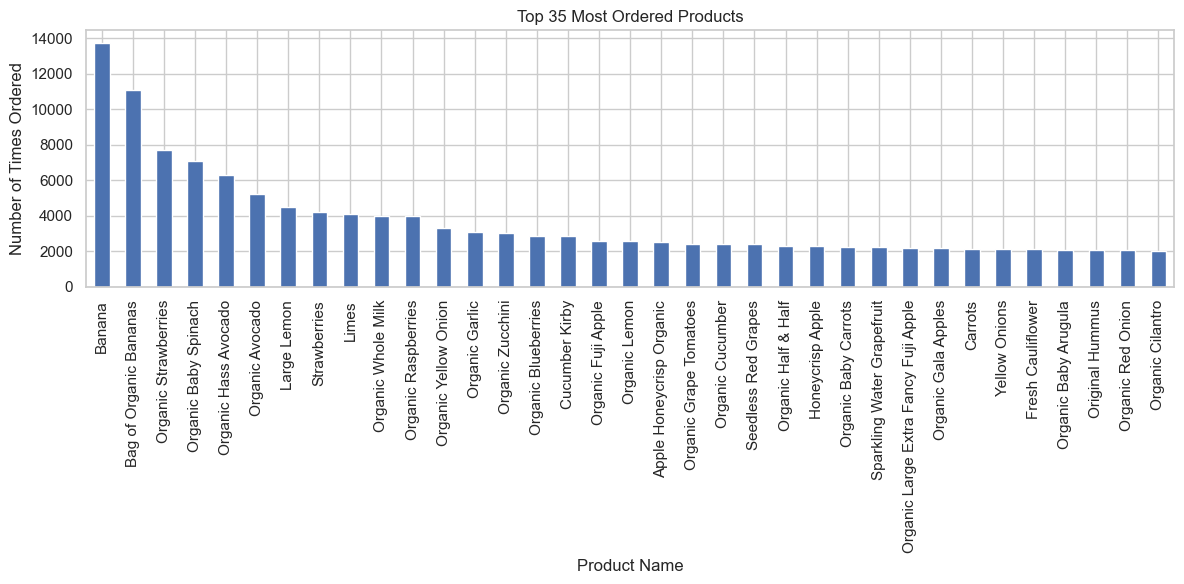

In [20]:
import matplotlib.pyplot as plt
top_products.plot(kind='bar', figsize=(12,6))
plt.title("Top 35 Most Ordered Products")
plt.ylabel("Number of Times Ordered")
plt.xlabel("Product Name")
plt.xticks(rotation=90)     # Rotate x-axis labels 90 degrees for better readability
plt.tight_layout()          # Adjust layout to prevent overlapping of plot elements
plt.show()


# Top 10 Products Ordered the Most

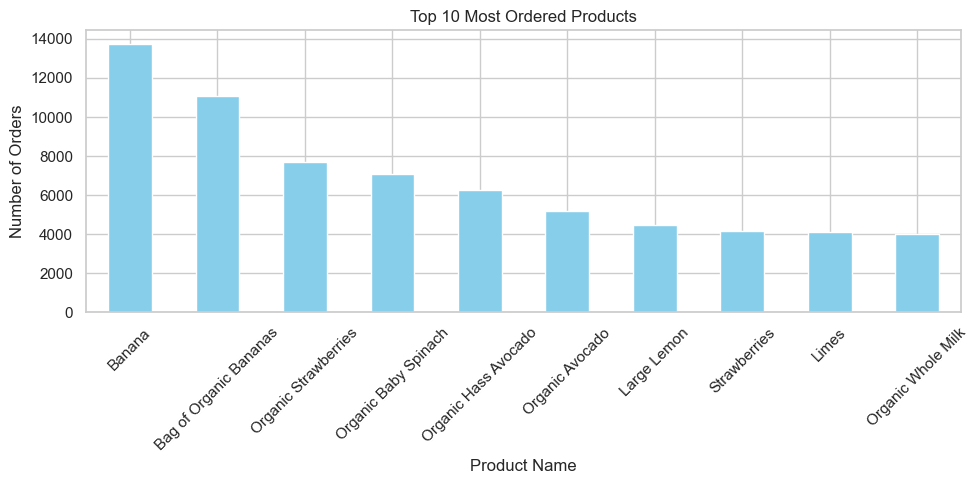

In [21]:
# Top 10 most ordered items
top_10 = final_data['product_name'].value_counts().head(10)

# Plot
top_10.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


observation : These are the most frequently purchased products across all baskets. Bananas are clearly the top favorite.

# Top 10 Users Who Ordered the Most

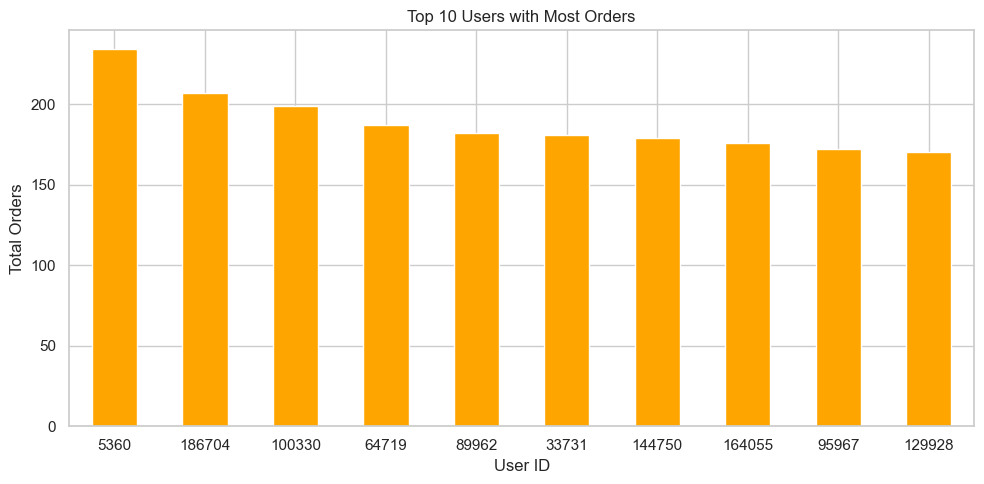

In [22]:
top_users = final_data['user_id'].value_counts().head(10)
top_users.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Top 10 Users with Most Orders')
plt.xlabel('User ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


observation : 5360 These are the most frequent shoppers in our sample. 

 # Create Basket Format (One Row = One Order) This is required for Apriori algorithm (to find product combinations).

The Apriori algorithm is used in Market Basket Analysis to identify items that are frequently bought together. It finds combinations (itemsets) that appear together in many transactions and then creates rules like:
"If a customer buys bread, they are likely to buy butter."
It works by checking itemsets with minimum support and confidence values.

In [23]:
# Get the top 35 most frequent product names
top_35_products = final_data['product_name'].value_counts().head(35).index.tolist()

# Keep only those rows in final_data that contain these top 35 products
filtered_data = final_data[final_data['product_name'].isin(top_35_products)]

# Group data by order_id and product_name, and count them
basket = filtered_data.groupby(['order_id', 'product_name'])['product_name'] \
                      .count().unstack().fillna(0)

# Convert counts to 1s and 0s (one-hot encoded format)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Show first few rows
print("Basket format created. Shape:", basket.shape)
basket.head()


C:\Users\pawar\AppData\Local\Temp\ipykernel_11708\3884412551.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Basket format created. Shape: (56100, 35)


product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Carrots,Cucumber Kirby,Fresh Cauliflower,Honeycrisp Apple,Large Lemon,Limes,Organic Avocado,Organic Baby Arugula,Organic Baby Carrots,Organic Baby Spinach,Organic Blueberries,Organic Cilantro,Organic Cucumber,Organic Fuji Apple,Organic Gala Apples,Organic Garlic,Organic Grape Tomatoes,Organic Half & Half,Organic Hass Avocado,Organic Large Extra Fancy Fuji Apple,Organic Lemon,Organic Raspberries,Organic Red Onion,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Original Hummus,Seedless Red Grapes,Sparkling Water Grapefruit,Strawberries,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
47,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
181,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
265,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#  Apriori to Find Frequent Itemsets

In [24]:
from mlxtend.frequent_patterns import apriori
# Set a low min_support (like 0.01 for testing)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Show top 10 frequent itemsets
print("Frequent Itemsets:")
frequent_itemsets.sort_values(by='support', ascending=False).head(10)


C:\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
2,0.245009,(Banana)
1,0.197291,(Bag of Organic Bananas)
26,0.137344,(Organic Strawberries)
12,0.125918,(Organic Baby Spinach)
21,0.112103,(Organic Hass Avocado)
9,0.092763,(Organic Avocado)
7,0.079626,(Large Lemon)
33,0.074724,(Strawberries)
8,0.073048,(Limes)
27,0.071123,(Organic Whole Milk)


I used the Apriori algorithm to find which products are frequently bought together.
Support shows how often that combination appears in all orders.

# Generate Association Rules
These rules help us understand “If a customer buys X, they’re likely to buy Y.”

In [25]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show top rules
print("Association Rules:")
rules.sort_values(by='confidence', ascending=False).head(10)


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
35,(Organic Fuji Apple),(Banana),0.045971,0.245009,0.018431,0.400931,1.636392,1.0,0.007168,1.260273,0.407639,0.067626,0.206521,0.238079
28,(Honeycrisp Apple),(Banana),0.040838,0.245009,0.014421,0.353121,1.441257,1.0,0.004415,1.167129,0.319197,0.053129,0.143196,0.205989
27,(Cucumber Kirby),(Banana),0.050731,0.245009,0.017308,0.341181,1.392523,1.0,0.004879,1.145976,0.296943,0.062164,0.127381,0.205912
36,(Seedless Red Grapes),(Banana),0.042549,0.245009,0.012977,0.304985,1.244793,1.0,0.002552,1.086295,0.205393,0.047260,0.079440,0.178975
12,(Organic Large Extra Fancy Fuji Apple),(Bag of Organic Bananas),0.039269,0.197291,0.011961,0.304585,1.543838,1.0,0.004213,1.154288,0.366662,0.053254,0.133665,0.182605
39,(Strawberries),(Banana),0.074724,0.245009,0.022531,0.301527,1.230677,1.0,0.004223,1.080916,0.202576,0.075811,0.074859,0.196744
33,(Organic Avocado),(Banana),0.092763,0.245009,0.027879,0.300538,1.226641,1.0,0.005151,1.079388,0.203658,0.089963,0.073549,0.207162
16,(Organic Raspberries),(Bag of Organic Bananas),0.070873,0.197291,0.021052,0.297032,1.505557,1.0,0.007069,1.141886,0.361408,0.085191,0.124256,0.201868
10,(Organic Hass Avocado),(Bag of Organic Bananas),0.112103,0.197291,0.032638,0.291143,1.475708,1.0,0.010521,1.132400,0.363059,0.117931,0.116920,0.228288
41,(Yellow Onions),(Banana),0.037683,0.245009,0.010606,0.281457,1.148762,1.0,0.001373,1.050725,0.134569,0.038981,0.048276,0.162373


Support: How common this combination is
Confidence: How often Y is bought when X is bought
Lift: How strong the relationship is (above 1 = good)

#   Scatter Plot (Lift vs Confidence)

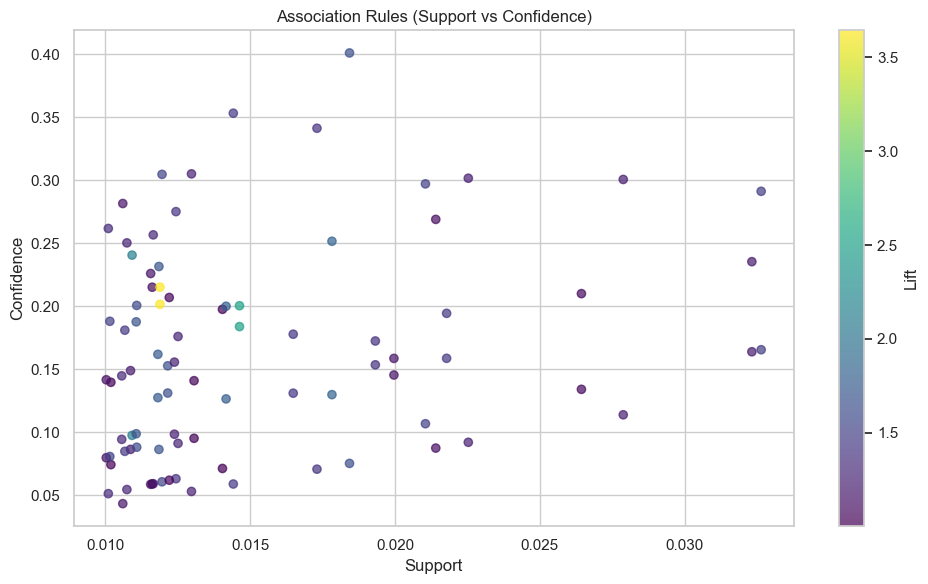

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Association Rules (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()


Each dot shows one rule.
Rules in the top-right are both common and strong (high support and confidence).
Darker colors mean higher lift, so those rules are more useful for recommendation.
This plot helps me easily spot the best rules.

#  Number of Products per Order

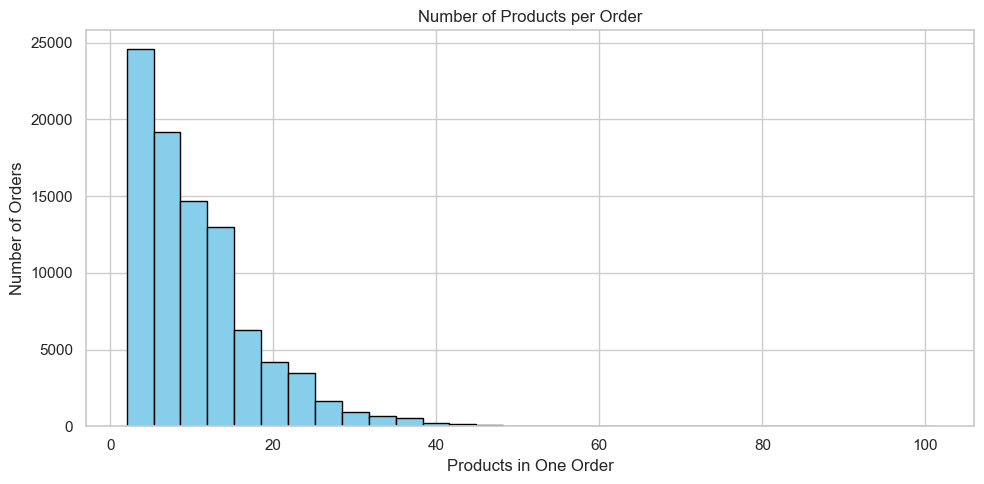

Average products per order: 10.57
Minimum: 2  |  Maximum: 101


In [27]:
#  its shows how many items customers usually buy in one basket.
# Count number of products in each order
product_counts = final_data.groupby('order_id')['product_name'].count()

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(product_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Products per Order')
plt.xlabel('Products in One Order')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average products per order:", round(product_counts.mean(), 2))
print("Minimum:", product_counts.min(), " |  Maximum:", product_counts.max())



This histogram shows how many products customers usually buy in a single order.
Most customers buy between 5 and 15 items per order.
A few large orders have over 30 items.
I also printed the average number of products per order to support my histogram visually.
This insight helps in understanding basket size behavior and how often customers do bulk shopping.

# Merge departments.csv into  final_data


We used departments.csv to know which category or section (like produce, dairy, snacks) each product belongs to, so we can analyze and visualize orders by department.



In [28]:
# Load departments.csv
departments = pd.read_csv(r"C:\Users\pawar\Downloads\archive\departments.csv")
# display
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# Merge it with products.csv and then with final_data

In [29]:
# First, merge products with departments
products_dept = products.merge(departments, on='department_id', how='left')

# Now merge that into your final_data (which already has product_id)
final_data = final_data.merge(products_dept[['product_id', 'department']], on='product_id', how='left')

# Check if department column is now added
final_data.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,user_id,department
0,33,5699,1,1,Gluten Free Mushroom Risotto Bowl,119866,frozen
1,33,32740,2,0,Cold-Brew Black Coffee,119866,beverages
2,33,8592,3,0,"Kale, Apple, Ginger, Romaine, Spinach, Cucumbe...",119866,beverages
3,33,1446,4,0,Organic Olive Oil Spray,119866,pantry
4,33,46313,5,0,Baby Swiss Slices Cheese,119866,dairy eggs


# Top 10 Departments by Orders

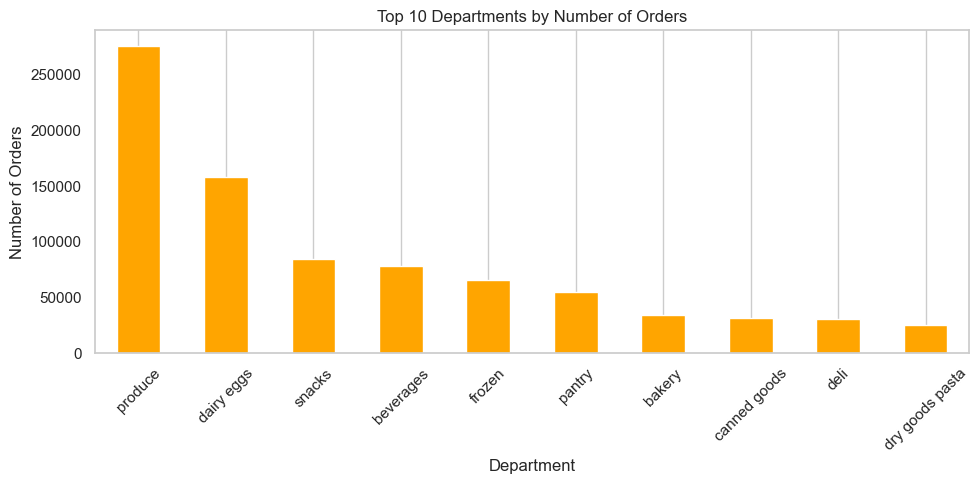

In [30]:
# Count how many times each department appears
top_depts = final_data['department'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
top_depts.plot(kind='bar', color='orange')
plt.title('Top 10 Departments by Number of Orders')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


I merged the departments.csv file to find out which grocery departments (like produce, dairy, frozen) were ordered most often.
This helps understand customer interest by category.
The most popular departments are usually produce, dairy, and snacks.

# Count Top Products

In [31]:
# Count how many times each product was ordered
top_products = final_data['product_name'].value_counts().head(10)

# Display it
top_products


product_name
Banana                    13745
Bag of Organic Bananas    11068
Organic Strawberries       7705
Organic Baby Spinach       7064
Organic Hass Avocado       6289
Organic Avocado            5204
Large Lemon                4467
Strawberries               4192
Limes                      4098
Organic Whole Milk         3990
Name: count, dtype: int64

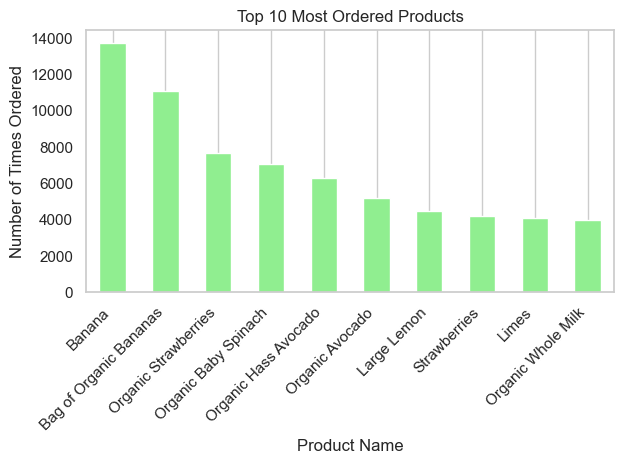

In [32]:
# plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Times Ordered')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This bar chart shows the top 10 most frequently purchased products in the dataset.
For example, bananas, bag of organic spinach, and strawberries are among the most common.

# Orders by Day of Week

This shows which days customers shop the most.

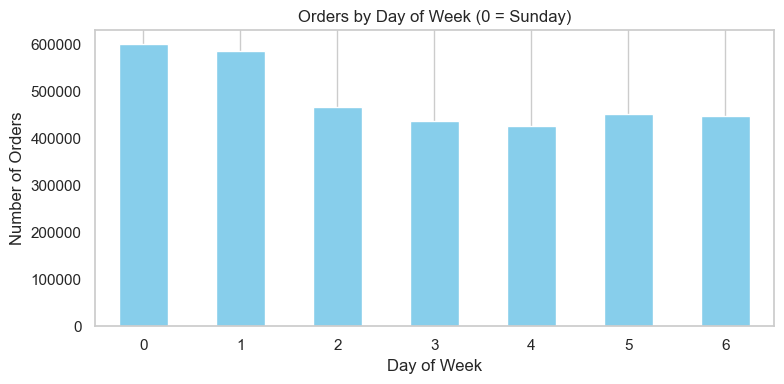

In [33]:
# Count orders per day of week
orders_per_day = orders['order_dow'].value_counts().sort_index()
plt.figure(figsize=(8,4))
orders_per_day.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of Week (0 = Sunday)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Day 0 means Sunday, 1 = Monday and  6 = Saturday.
Most orders are placed on Sundays and Mondays.

# Orders by Hour of Day

This shows what time of day people shop most.



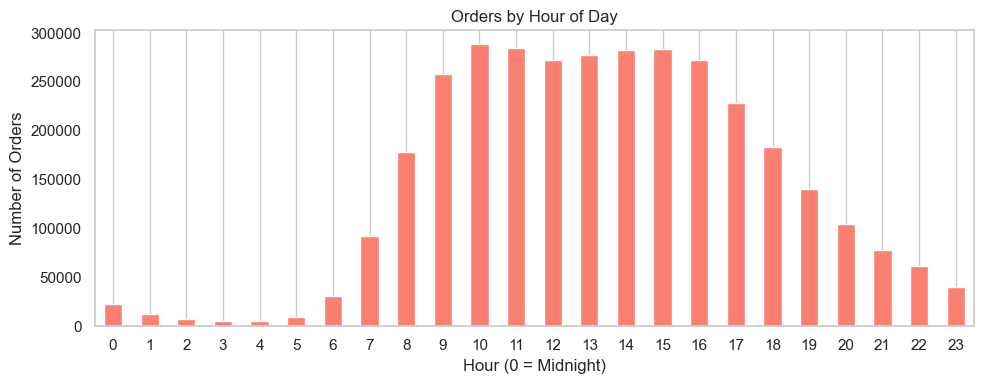

In [34]:
# Count orders per hour
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,4))
orders_per_hour.plot(kind='bar', color='salmon')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour (0 = Midnight)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Most orders are placed between 10 AM to 3 PM.

# Days Since Prior Order

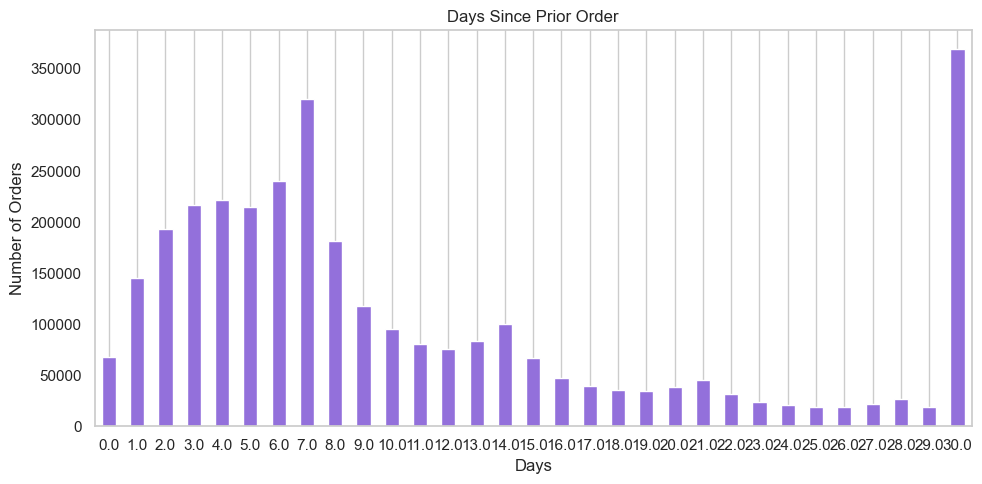

In [35]:
# Remove missing values first
orders_days = orders['days_since_prior_order'].dropna()

# Plot
plt.figure(figsize=(10,5))
orders_days.value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Total Unique Products Ordered

This shows how many different products customers actually bought.

In [36]:
unique_products = final_data['product_name'].nunique()
print("Total Unique Products Ordered:", unique_products)


Total Unique Products Ordered: 34800


this number tells us the total number of unique items customers have purchased.


# Most Commonly Ordered Product Pair

In [37]:
from itertools import combinations
from collections import Counter

# Group by order and collect product lists
grouped = final_data.groupby('order_id')['product_name'].apply(list)

# Get combinations of 2 from each list
pair_counter = Counter()

for products in grouped:
    pairs = combinations(sorted(set(products)), 2)
    pair_counter.update(pairs)

# Most common pair
most_common_pair = pair_counter.most_common(1)
print(" Most Common Product Pair:", most_common_pair[0][0])
print("Number of Orders with this Pair:", most_common_pair[0][1])


 Most Common Product Pair: ('Bag of Organic Bananas', 'Organic Hass Avocado')
Number of Orders with this Pair: 1831


This shows the most frequent 2-product combo bought together in one order.

# Share of Top 5 Products 

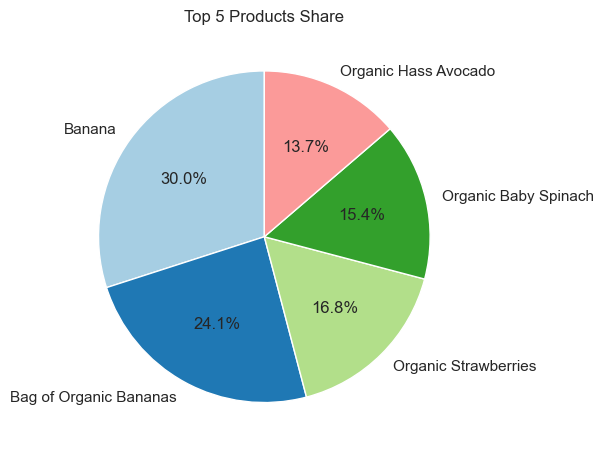

In [38]:
top5 = final_data['product_name'].value_counts().head(5)

plt.figure(figsize=(6,6))
top5.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Products Share')
plt.ylabel('')
plt.tight_layout()
plt.show()


# Orders Over Time 

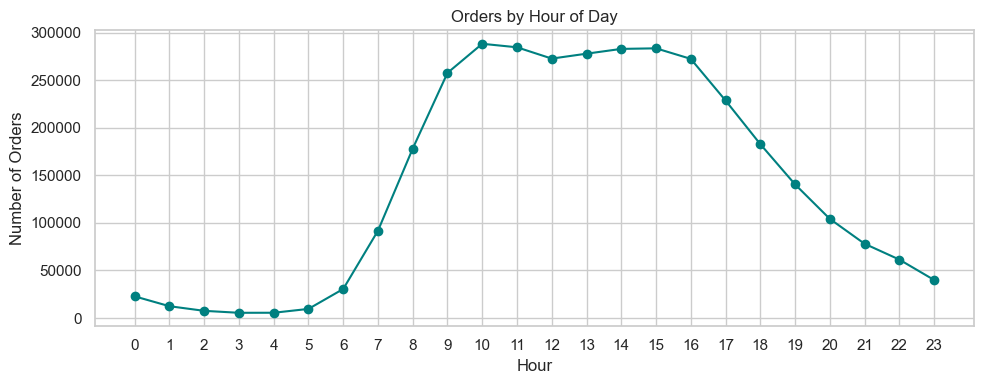

In [39]:
hourly = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(hourly.index, hourly.values, marker='o', color='teal')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


This line chart shows that most orders happen between 10 AM and 4 PM.


# Top 5 Users with Most Orders

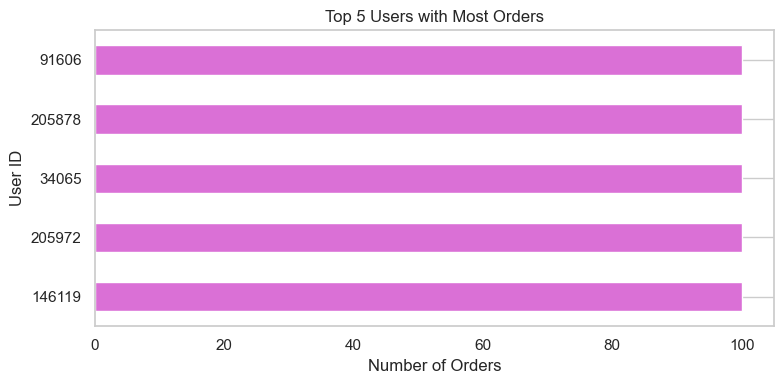

In [40]:
top_users = orders['user_id'].value_counts().head(5)

plt.figure(figsize=(8,4))
top_users.plot(kind='barh', color='orchid')
plt.title('Top 5 Users with Most Orders')
plt.xlabel('Number of Orders')
plt.ylabel('User ID')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


This horizontal bar chart shows which users placed the most orders.


# Average Number of Products per Order

In [41]:
avg_items = final_data.groupby('order_id')['product_name'].count().mean()
print("Average Products per Order:", round(avg_items, 2))


Average Products per Order: 10.57


This tells how many items customers usually buy in one order.
Helps understand average basket size

 # Distribution of Basket Sizes 

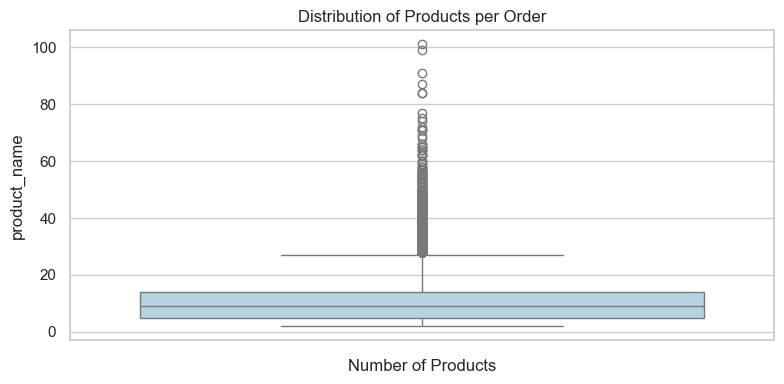

In [42]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(data=final_data.groupby('order_id')['product_name'].count(), color='lightblue')
plt.title('Distribution of Products per Order')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()


This box plot shows the range and distribution of products in each order.
Most customers buy between 5 and 15 items, with few big orders.

# Most Frequently Reordered Products

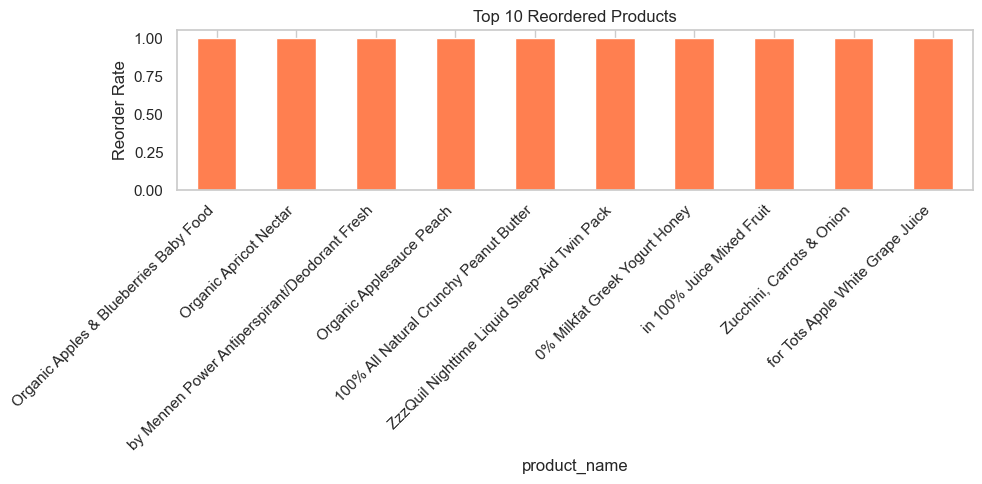

In [43]:
if 'reordered' in prior.columns:
    reordered = merged.groupby('product_name')['reordered'].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,5))
    reordered.plot(kind='bar', color='coral')
    plt.title('Top 10 Reordered Products')
    plt.ylabel('Reorder Rate')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


This shows which products people are most likely to buy again.
Useful for predicting repeat demand

# Word Cloud of Most Ordered Products

In [55]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 131.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 172.4 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/301.2 kB 209.0 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.2 kB 218.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 277.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 277.4 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/301.2 kB 443.5 kB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Python312\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


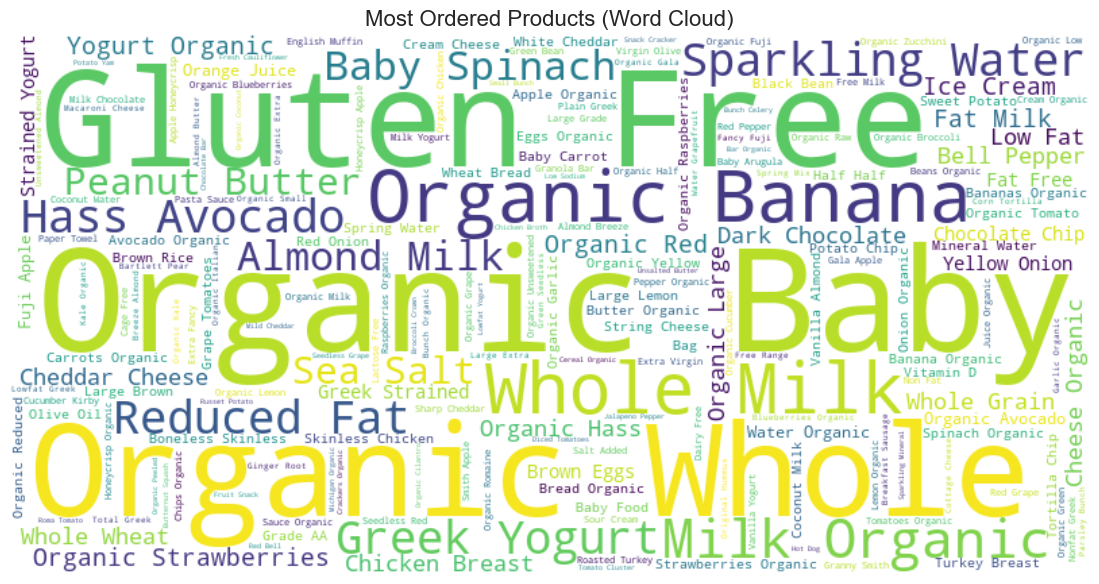

In [57]:
from wordcloud import WordCloud

# Generate word cloud from product names
text = " ".join(merged['product_name'].dropna())

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # interpolation = smoothing
plt.axis('off')  # hide axis
plt.title("Most Ordered Products (Word Cloud)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
The bigger the word, the more frequently that product was ordered.
It gives a quick visual of popular items like organic bananas,yogurt milk organic.



# How often do users reorder products

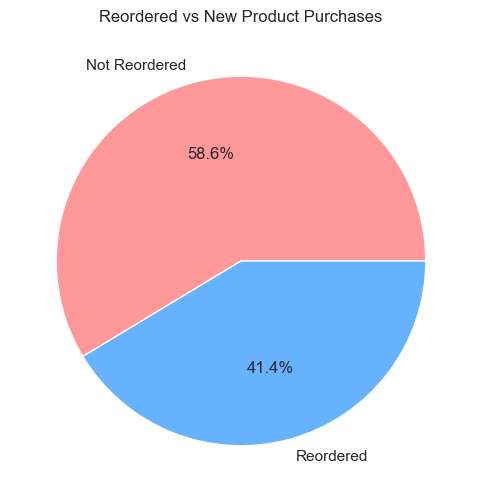

In [60]:
# Check how many products are reordered vs not
reorder_counts = merged['reordered'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(reorder_counts, labels=['Not Reordered', 'Reordered'], autopct='%1.1f%%', colors=['#FF9999','#66B2FF'])
plt.title('Reordered vs New Product Purchases')
plt.show()


This shows 41.4 % of products were bought again.
If "Reordered" is high, it means users often repeat purchases.



# Which users ordered the most?

C:\Users\pawar\AppData\Local\Temp\ipykernel_11708\3498300137.py:11: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


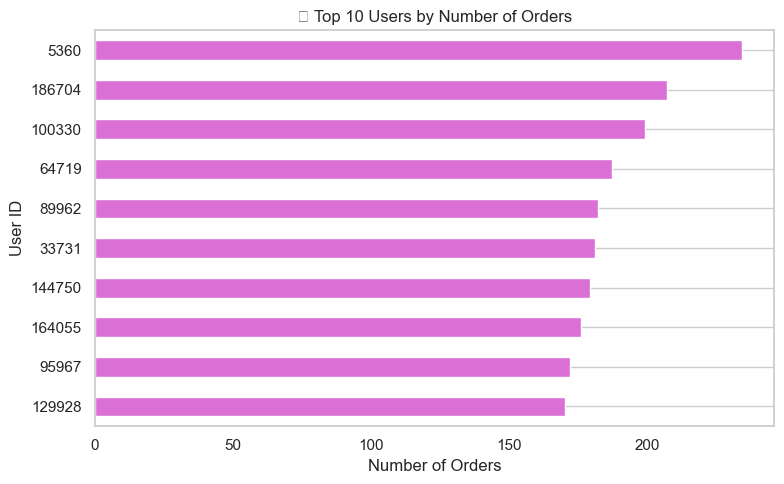

In [63]:
# Count number of orders per user
top_users = merged['user_id'].value_counts().head(10).sort_values()

# Horizontal bar chart
plt.figure(figsize=(8,5))
top_users.plot(kind='barh', color='orchid')
plt.title('Top 10 Users by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('User ID')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



In [ ]:
This shows that 5360  customers were most active.
Great for discounts.

## Conclusion

In this project, I performed an Exploratory Data Analysis (EDA) on the Instacart grocery dataset using over 5 lakh records sampled from the original 32 million transactions.

I used 4 main CSV files:
- orders.csv
- order_products__prior.csv
- products.csv
- departments.csv

### Insights:
- Most orders contain 5 to 15 products
- Shopping peaks during 10 AM – 3 PM and on weekends
- Top products include bananas, organic spinach, and strawberries
- Customers usually reorder after 7, 14, or 30 days
- Certain product combinations are frequently bought together
- Many customers are repeat buyers

### Conclusion:
from this i can say that Customer buying behavior is predictable:
-Users buy the same items often (reorders)
-Mornings and weekends are most active
-Some items (like milk, eggs) are in almost every cart
-This analysis can help design better product recommendations and offers.
These insights can help Instacart improve recommendations, manage stock, and understand customer behavior better. The project was done using a simplified and filtered approach to maintain performance and clarity on a 4GB system, while still using real, large-scale data.

